#Importing Keras libraries

In [1]:
import keras

#Importing ImageDataGenerator from Keras

In [2]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

#Defining the Parameters

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)


#Applying ImageDataGenerator functionality to train dataset



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/IBM PROJECT/dataset/Train_set',target_size=(128,128),batch_size=32,class_mode='binary')


Found 436 images belonging to 2 classes.


#Applying ImageDataGenerator functionality to test dataset

In [6]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/IBM PROJECT/dataset/Test_set',target_size=(128,128),batch_size=32,class_mode='binary')


Found 121 images belonging to 2 classes.


#Importing Model Building Libraries

In [7]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

#Initializing the model

In [8]:
model=Sequential()

#Adding CNN Layers

In [9]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

#Add Dense layers

In [233]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

#configuring the learning process

In [234]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

#Training the model

In [12]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 64s 4s/step - loss: 1.8125 - accuracy: 0.7156 - val_loss: 0.1683 - val_accuracy: 0.9174
Epoch 2/10
14/14 [==============================] - 27s 2s/step - loss: 0.2314 - accuracy: 0.8968 - val_loss: 0.1150 - val_accuracy: 0.9669
Epoch 3/10
14/14 [==============================] - 27s 2s/step - loss: 0.2175 - accuracy: 0.8991 - val_loss: 0.0904 - val_accuracy: 0.9752
Epoch 4/10
14/14 [==============================] - 27s 2s/step - loss: 0.2003 - accuracy: 0.9128 - val_loss: 0.1230 - val_accuracy: 0.9669
Epoch 5/10
14/14 [==============================] - 26s 2s/step - loss: 0.1811 - accuracy: 0.9151 - val_loss: 0.1221 - val_accuracy: 0.9421
Epoch 6/10
14/14 [==============================] - 27s 2s/step - loss: 0.1935 - accuracy: 0.9083 - val_loss: 0.0809 - val_accuracy: 0.9752
Epoch 7/10
14/14 [==============================] - 27s 2s/step - loss: 0.2060 - accuracy: 0.9128 - val_loss: 0.1236 - val_accuracy: 0.9504
Epoch 8/10
14/14 [==

#Save the model

In [255]:
model.save("forest.h5")

#Predictions

In [264]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model("forest.h5")
img=image.load_img('/content/image.jpg')
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)




In [265]:
pred=model.predict(x)


1/1 [==============================] - 0s 104ms/step


In [266]:
pred

array([[0.5]], dtype=float32)


**Video Analasys**


In [267]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
!pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=df435d090d6c51c0ada946e2a32d472aa8e56aec5ab6a327b3590a934bdd8acf
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [19]:
!pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.9 MB/s 


In [80]:
import cv2


In [81]:
import numpy as np

In [82]:
from keras.models import load_model

In [83]:
from twilio.rest import Client

In [84]:
from playsound import playsound

In [268]:
model=load_model('forest.h5')

In [328]:
video = cv2.VideoCapture("/content/wf.jpg")

In [329]:
name=['forest','with fire']

In [330]:
from google.colab.patches import cv2_imshow

1/1 [==============================] - 0s 38ms/step
[[0.5]]
SM2d4ededdeacaa8306f7435a1b7a8b78e
Fire Detected
SMS sent!


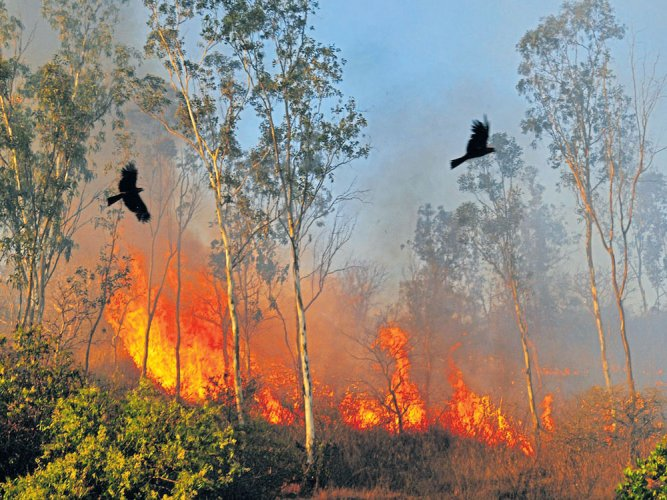

error: ignored

In [331]:
while(1):
  success,frame=video.read()
  cv2.imwrite("img.jpg",frame)
  img=image.load_img("img.jpg",target_size=(64,64))
  x=image.img_to_array(img)
  res = cv2.resize(x, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
  x=np.expand_dims(res,axis=0)
  pred=model.predict(x)
  p=pred[0]
  print(pred)
  #cv2.putText(frame,"predicted class = "+str(name[p]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0))
  if pred[0]==0.5:
    #twilio account ssid
    account_sid='AC7f84c5e7e45e719ac1fa8a864856dabd'
    #twilio account authentication token
    auth_token ='9d75b58ef68f2e9984166e08f296656f'
    client=Client(account_sid,auth_token)

    message=client.messages \
    .create(
        body='Forest Fire is detected,stay alert',
        #use twilio free number
        from_='+15626207392',
        #to number
        to='+918667398694')
    print(message.sid)
    print('Fire Detected')
    print('SMS sent!')
  else:
    print('No Danger')
    #break
  imgs = cv2.imread("/content/wf.jpg")
  cv2_imshow(imgs)
  if cv2.waitKey(1) & 0xFF == ord('a'):
     break
video.release()
cv2.destroyAllWindows()